# Problem 1

In [7]:
%plot -s 1500,1500

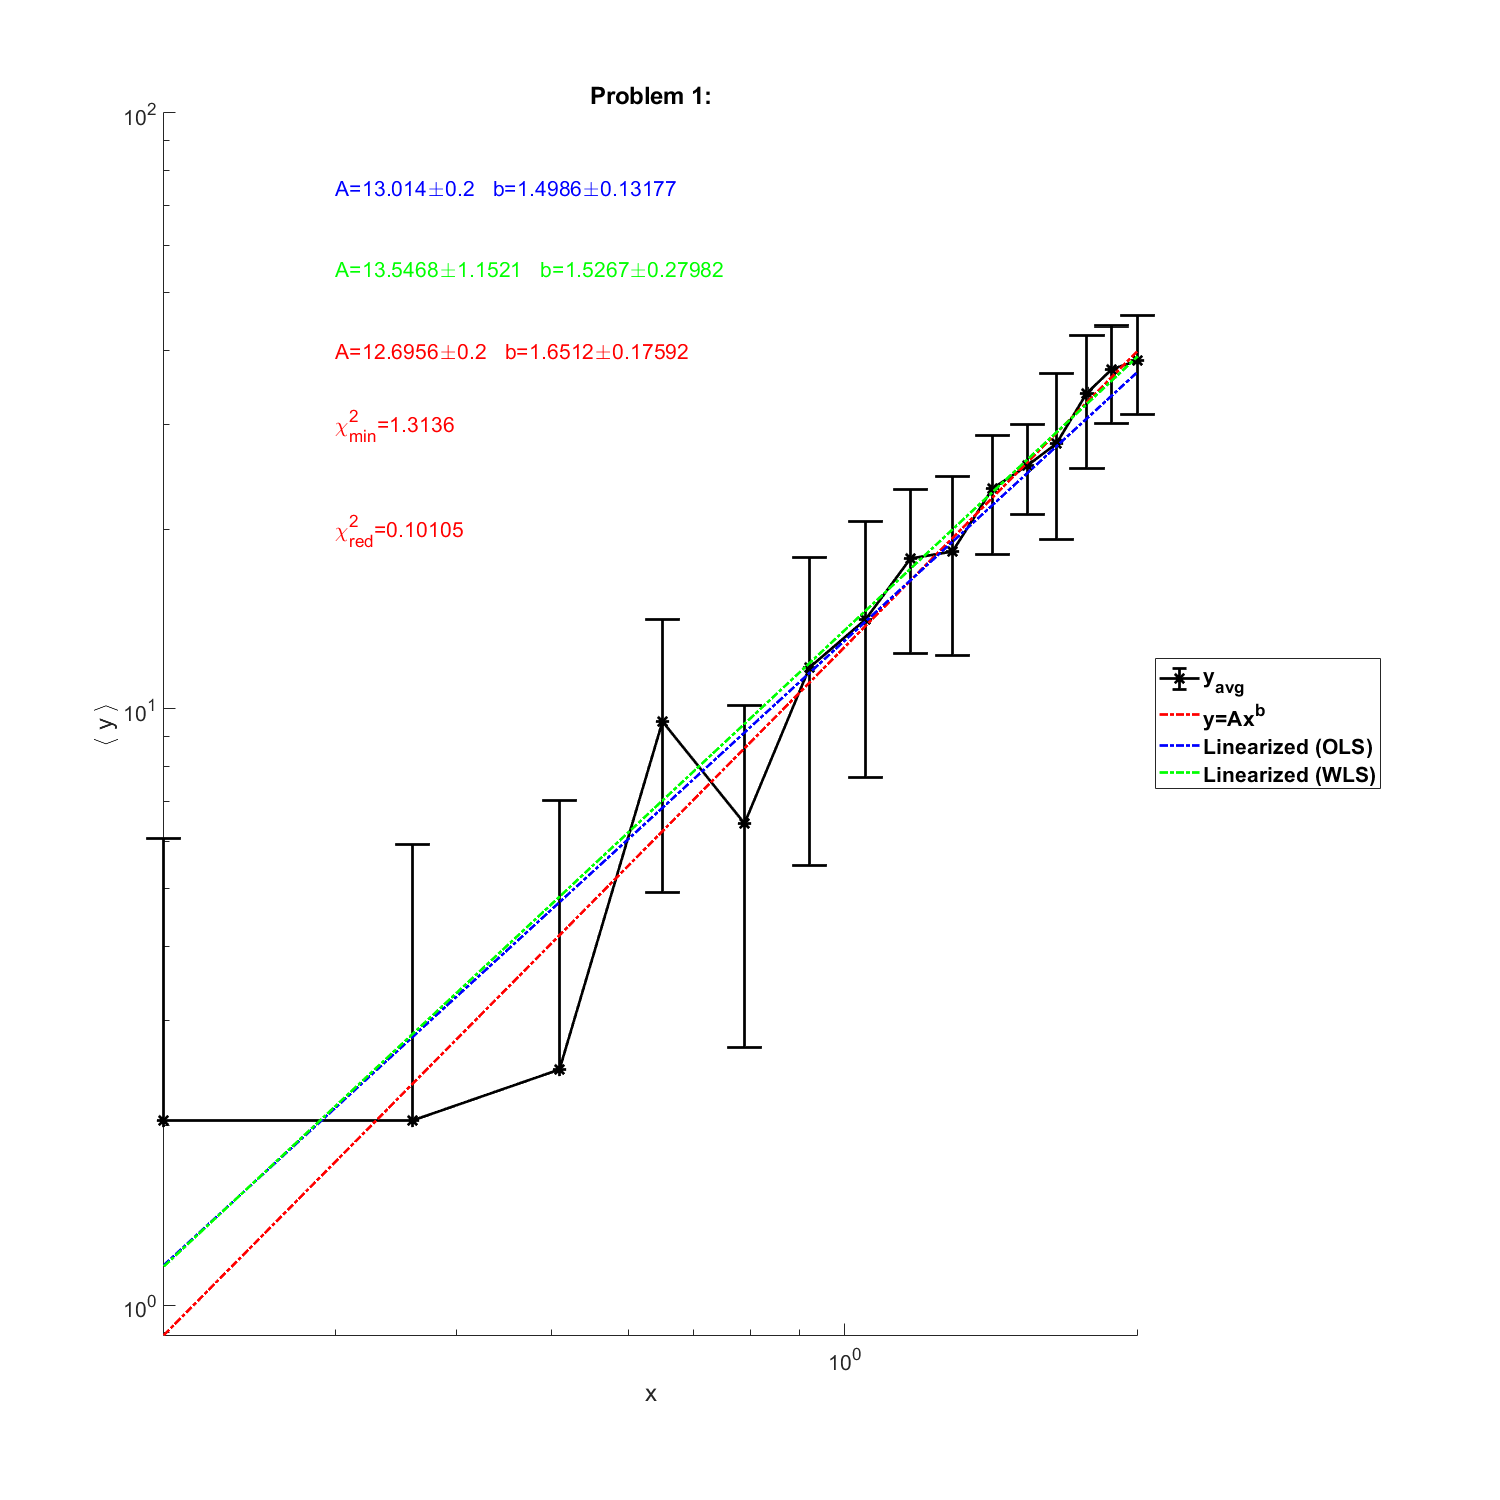

In [8]:
clear all

%% initial parameter for fitting
A = 1;
b = 1;

% read data for prob 1
fid    = fopen('hw2data.txt','r');
title1 = fgetl(fid);
label1 = fgetl(fid);
data   = fscanf(fid,'%f',[11 Inf]).';          

% initialization
x   = data(:,1);
y   = data(:,2:end);
dof = size(x,1)-2;
p0   = [A b];
fit = @(p, x) p(1) .*(x.^p(2));

%% Prob1 (a)
% avg and stdev
yavg = mean(y,2);
ystd = std(y,0,2);
% find (reduced) chi square
chi2   = @(p) sum( ((yavg - fit(p, x)) ./ ystd).^2 );
pmin   = fminsearch(chi2, p0);
chimin = chi2(pmin);
chired = chimin/dof;
% Chi-squared min + 1 
r = 0.2;
Arange = linspace(pmin(1) - r, pmin(1) + r, 300);
brange = linspace(pmin(2) - r, pmin(2) + r, 300);
[X, Y] = ndgrid(Arange, brange);
% Compute Chi-squared at each point in parameter space
Z = zeros(size(X));
for i = 1:size(X, 1)
    for j = 1:size(X, 2)
        Z(i, j) = chi2( [X(i, j), Y(i, j)] );
    end
end
% Look for all values in Z that compute as less than Chi^2 + 1
[idxA, idxb] = find(Z <= chimin + 1);
% Make sure range was set correctly by checking how many grid points were
% found in the chi2 + 1 ellipse (percentage of grid points)
if numel(idxA)/numel(X) < 0.01
    warning('Ellipse is too small, please zoom in for better precision.');
end
% Compute uncertainty in A and b
dAmin = min(Arange(idxA)); dAmax = max(Arange(idxA));
dbmin = min(brange(idxb)); dbmax = max(brange(idxb));
dA = (dAmax - dAmin)/2;  
db = (dbmax - dbmin)/2;

%% Prob1 (b)
% initialization
lnx  = log(x);
lny  = log(y);
lnp0 = log(p0);
lnfit = @(p, x) log(p(1) .*(x.^p(2)));
% avg and stdev
lnyavg = log(yavg);
lnystd = ystd./yavg;
% find (reduced) chi square by OLS
lnchi2   = @(p) sum( (lnyavg - lnfit(p, x)).^2);
lnpmin   = fminsearch(lnchi2, lnp0);
lnchimin = lnchi2(lnpmin);
lnchired = lnchimin/dof;
% Chi-squared min + 1 
r = 0.2;
Arange = linspace(lnpmin(1) - r, lnpmin(1) + r, 300);
brange = linspace(lnpmin(2) - r, lnpmin(2) + r, 300);
[X, Y] = ndgrid(Arange, brange);
% Compute Chi-squared at each point in parameter space
Z = zeros(size(X));
for i = 1:size(X, 1)
    for j = 1:size(X, 2)
        Z(i, j) = chi2( [X(i, j), Y(i, j)] );
    end
end
% Look for all values in Z that compute as less than Chi^2 + 1
[idxA, idxb] = find(Z <= chimin + 1);
% Make sure range was set correctly by checking how many grid points were
% found in the chi2 + 1 ellipse (percentage of grid points)
if numel(idxA)/numel(X) < 0.01
    warning('Ellipse is too small, please zoom in for better precision.');
end
% Compute uncertainty in A and b
dAmin = min(Arange(idxA)); dAmax = max(Arange(idxA));
dbmin = min(brange(idxb)); dbmax = max(brange(idxb));
dlnA = (dAmax - dAmin)/2;  
dlnb = (dbmax - dbmin)/2;

%% Prob1 (c)
X      = [ones(length(x),1),lnx];
W      = diag(1./(lnystd.^2));
beta   = inv(X.'*W*X)*(X.'*W*lnyavg);
dbeta  = sqrt(diag(inv(X.'*W*X)));
lnfit2 = @(p, x) p(1)+ p(2)*log(x);

%% Prob1 (d)
figure()
hold on
errorbar(x,yavg,ystd,'k-*','CapSize',15,'MarkerSize',10,'LineWidth',2)
plot(x,fit(pmin,x),'r-.','LineWidth',2)
plot(x,exp(lnfit(lnpmin,x)),'b-.','LineWidth',2)
plot(x,exp(lnfit2(beta,x)),'g-.','LineWidth',2)
xlabel('x')
ylabel('\langle y \rangle')
title(strtrim(title1))
lgd = legend('y_{avg}','y=Ax^b','Linearized (OLS)','Linearized (WLS)');
lgd.Location = 'eastoutside';
lgd.FontSize = 16;
lgd.FontWeight = 'bold';
ax = gca;
ax.FontSize = 16;
set(ax, 'YScale', 'log')
set(ax, 'XScale', 'log')
text(0.3,40,['A=',num2str(pmin(1)),'\pm',num2str(dA),...
             '   b=',num2str(pmin(2)),'\pm',num2str(db)],'FontSize',16,'Color','r')
text(0.3,75,['A=',num2str(lnpmin(1)),'\pm',num2str(dlnA),...
             '   b=',num2str(lnpmin(2)),'\pm',num2str(dlnb)],'FontSize',16,'Color','b')
text(0.3,55,['A=',num2str(exp(beta(1))),'\pm',num2str(exp(dbeta(1))),...
             '   b=',num2str(beta(2)),'\pm',num2str(dbeta(2))],'FontSize',16,'Color','g')
text(0.3,30,['\chi_{min}^2=',num2str(chimin)],'FontSize',16,'Color','r')
text(0.3,20,['\chi_{red}^2=',num2str(chired)],'FontSize',16,'Color','r')
% text(0.3,20,['\chi_{min}^2=',num2str(lnchimin)],'FontSize',16,'Color','b')
% text(0.3,15,['\chi_{red}^2=',num2str(lnchired)],'FontSize',16,'Color','b')
set(gcf, 'Position',  [150, 150, 2000, 1600])

## The OLS line and WLS line are close when x is small. However, they deviate when x becomes larger. Both deviate from the $\chi^2$ line when x is small, but the WLS line gets closer to the $\chi^2$ line when x becomes larger. The WLS method is more appropriate than the OLS method in this case because the standard deviations of each data point are different.

# Problem 2

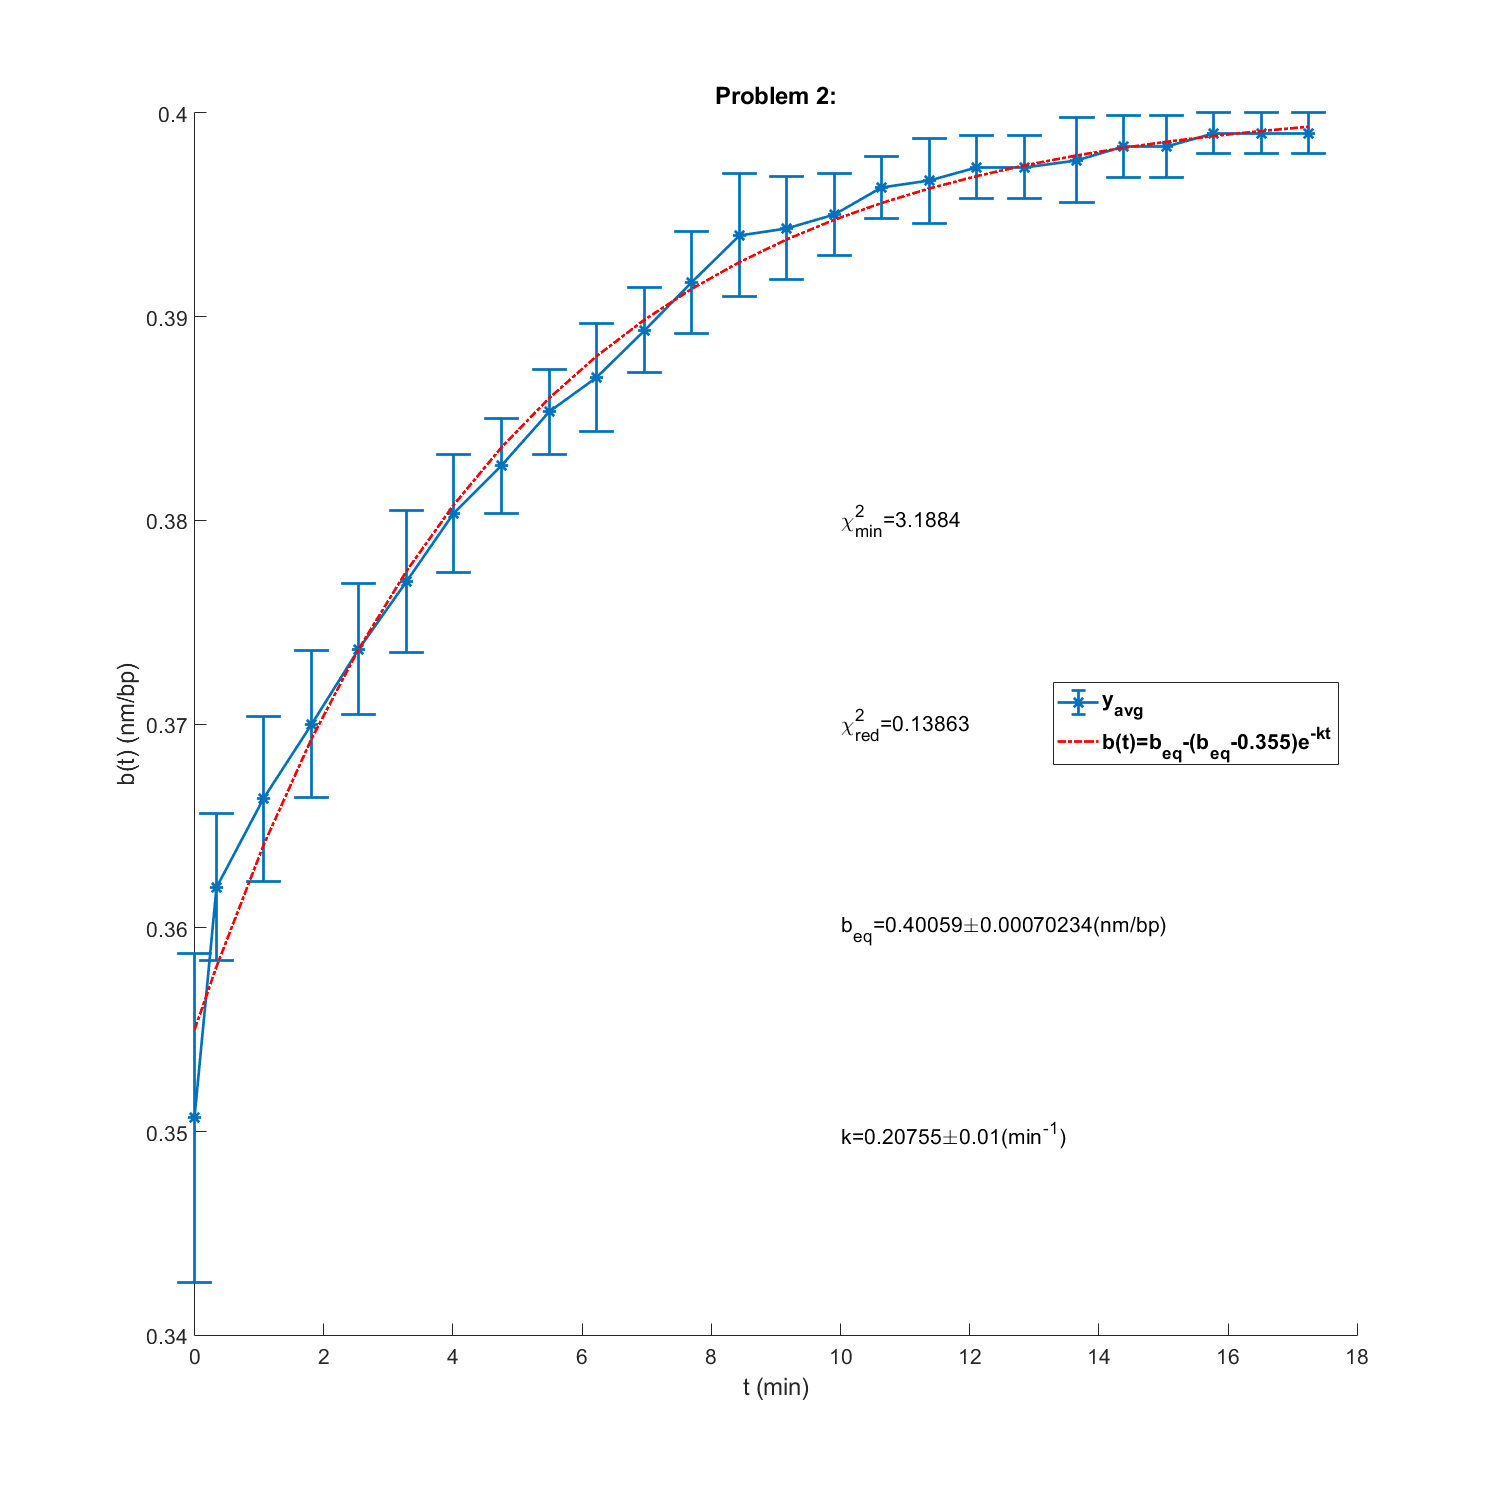

In [10]:
clear all

%% initial parameter for fitting
beq = 1;
k   = 1;

% filter out data for prob 1
fid   = fopen('hw2data.txt','r');
title1 = fgetl(fid);
label1 = fgetl(fid);
data  = fscanf(fid,'%f',[11 Inf]).'; 
% read data for prob 2
title1 = fgetl(fid);
label1 = fgetl(fid);       
data  = fscanf(fid,'%f',[4 Inf]).';

% initialization
x   = data(:,1);
y   = data(:,2:end);
dof = size(x,1)-2;
p0   = [beq k];
fit = @(p, x) p(1)*ones(length(x),1)-(p(1)-0.355).*exp(-p(2).*x);

%% Prob1 (a)
% avg and stdev
yavg = mean(y,2);
ystd = std(y,0,2);
% find (reduced) chi square
chi2   = @(p) sum( ((yavg - fit(p, x)) ./ ystd).^2 );
pmin   = fminsearch(chi2, p0);
chimin = chi2(pmin);
chired = chimin/dof;
%fprintf('beq=%f, k=%f \n',pmin(1),pmin(2))
%fprintf('Chi_{min}=%f, Chi_{red}=%f \n',chimin,chired)
% Chi-squared min + 1 
r = 0.01;
Arange = linspace(pmin(1) - r, pmin(1) + r, 300);
brange = linspace(pmin(2) - r, pmin(2) + r, 300);
[X, Y] = ndgrid(Arange, brange);
% Compute Chi-squared at each point in parameter space
Z = zeros(size(X));
for i = 1:size(X, 1)
    for j = 1:size(X, 2)
        Z(i, j) = chi2( [X(i, j), Y(i, j)] );
    end
end
% Look for all values in Z that compute as less than Chi^2 + 1
[idxA, idxb] = find(Z <= chimin + 1);
% Make sure range was set correctly by checking how many grid points were
% found in the chi2 + 1 ellipse (percentage of grid points)
if numel(idxA)/numel(X) < 0.01
    warning('Ellipse is too small, please zoom in for better precision.');
end
% Compute uncertainty in A and b
dAmin = min(Arange(idxA)); dAmax = max(Arange(idxA));
dbmin = min(brange(idxb)); dbmax = max(brange(idxb));
dA = (dAmax - dAmin)/2;   
db = (dbmax - dbmin)/2;
%fprintf('delta beq=%f, delta k=%f \n',dA,db)

figure()
hold on
errorbar(x,yavg,ystd,'-*','CapSize',15,'MarkerSize',10,'LineWidth',2)
plot(x,fit(pmin,x),'r-.','LineWidth',2)
xlabel('t (min)')
ylabel('b(t) (nm/bp)')
title(strtrim(title1))
lgd = legend({'y_{avg}','b(t)=b_{eq}-(b_{eq}-0.355)e^{-kt}'});
lgd.Location = 'east';
lgd.FontSize = 16;
lgd.FontWeight = 'bold';
ax = gca;
ax.FontSize = 16;
text(10,0.38,['\chi_{min}^2=',num2str(chimin)],'FontSize',16)
text(10,0.37,['\chi_{red}^2=',num2str(chired)],'FontSize',16)
text(10,0.36,['b_{eq}=',num2str(pmin(1)),'\pm',num2str(dA),'(nm/bp)'],'FontSize',16)
text(10,0.35,['k=',num2str(pmin(2)),'\pm',num2str(db),'(min^{-1})'],'FontSize',16)